<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
#We added this code so that it does not display errors as a red box

## Load and Prepare Data

In [3]:
df = pd.read_csv("googleplaystore.csv")
#Load date with pandas

## EDA

In [4]:
df.head()
#Seeing the first 5 data is to have an idea about the data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.info()
#Get information about columns and the data type of each column and the number of available data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### We can see out-of-range data 👇
we should have rating in range 0 to 5

In [9]:
df["Rating"].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.8        8
1.7        8
1.6        4
1.5        3
1.4        3
1.2        1
19.0       1
Name: Rating, dtype: int64

#### replace out-of-range data with nan

In [10]:
 df = df.replace(19, np.nan)

In [11]:
df["Rating"].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
2.1       8
1.8       8
1.7       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: Rating, dtype: int64

## Data Preprocessing

### we have two options for cleaning up data
1. replace with average
2. delete a row with nan value

###### we choose "replace nan values with average"

replace all the NaNs in column Rating with the average of column Rating

In [12]:
df.Rating = df.Rating.fillna(df.Rating.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We can drop all rows with NaN
I write the code but I do not run it

In [13]:
#df = df.dropna()    we should reset index
#df = df.reset_index(drop = True)

## Strorytelling - Visualization

Data editing completed

<h6>We now draw some diagrams with parts of the data to understand the connection between the different parts of the data.</h6>

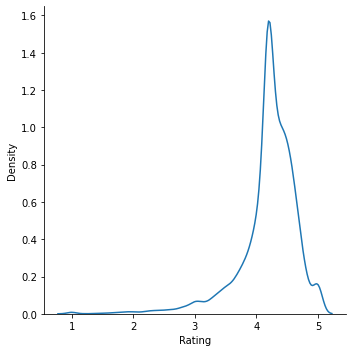

In [14]:
sns.displot(df, x="Rating", kind="kde")

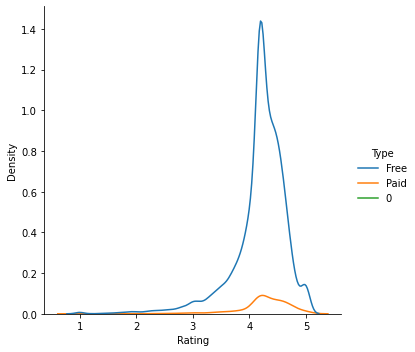

In [15]:
sns.displot(df, x="Rating", hue="Type", kind="kde")

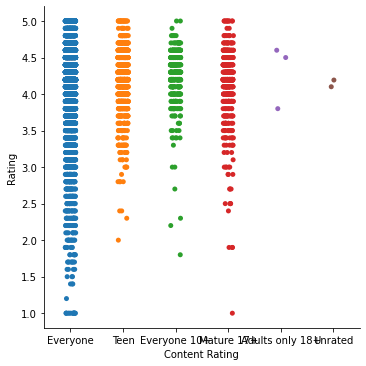

In [16]:
sns.catplot(x="Content Rating", y="Rating", data=df)

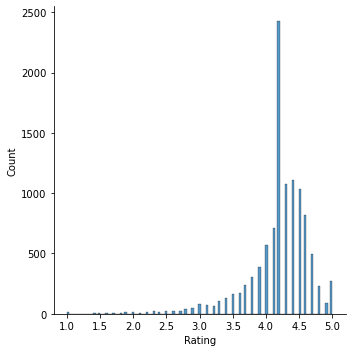

In [17]:
sns.displot(df, x="Rating")

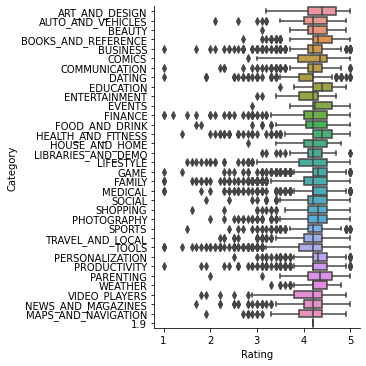

In [18]:
sns.catplot(x="Rating", y="Category", kind="box", data=df)

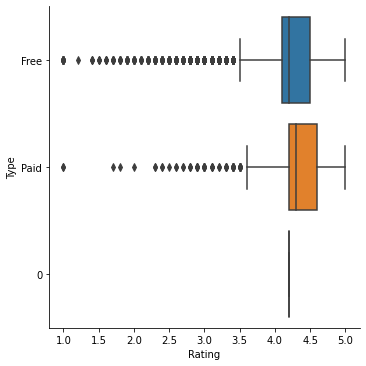

In [19]:
sns.catplot(x="Rating", y="Type", kind="box", data=df)

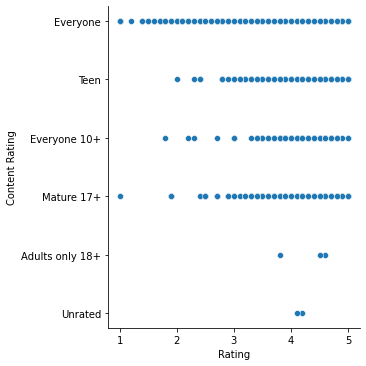

In [20]:
sns.relplot(x="Rating", y="Content Rating", data=df)

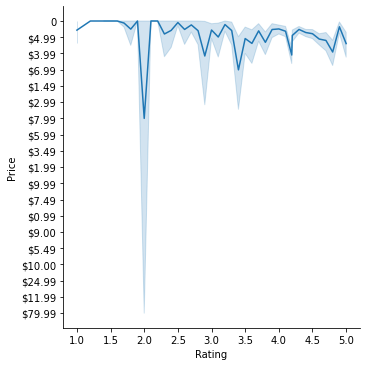

In [21]:
sns.relplot(x="Rating", y="Price", kind="line", data=df)

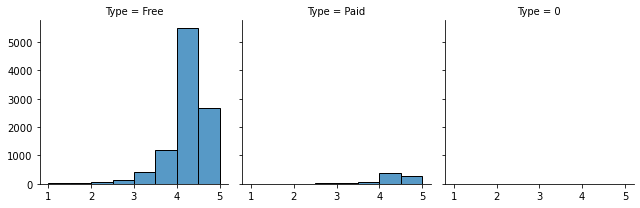

In [22]:
g = sns.FacetGrid(df, col="Type")
g.map_dataframe(sns.histplot, x="Rating", binwidth=0.5)

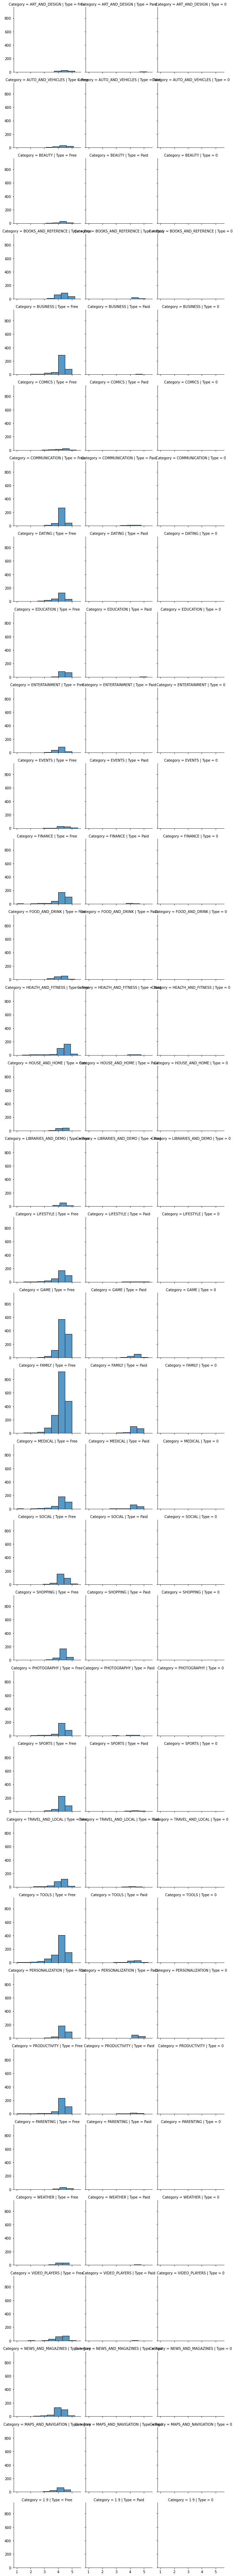

In [23]:
g2 = sns.FacetGrid(df, col="Type", row="Category")
g2.map_dataframe(sns.histplot, x="Rating", binwidth=0.5)

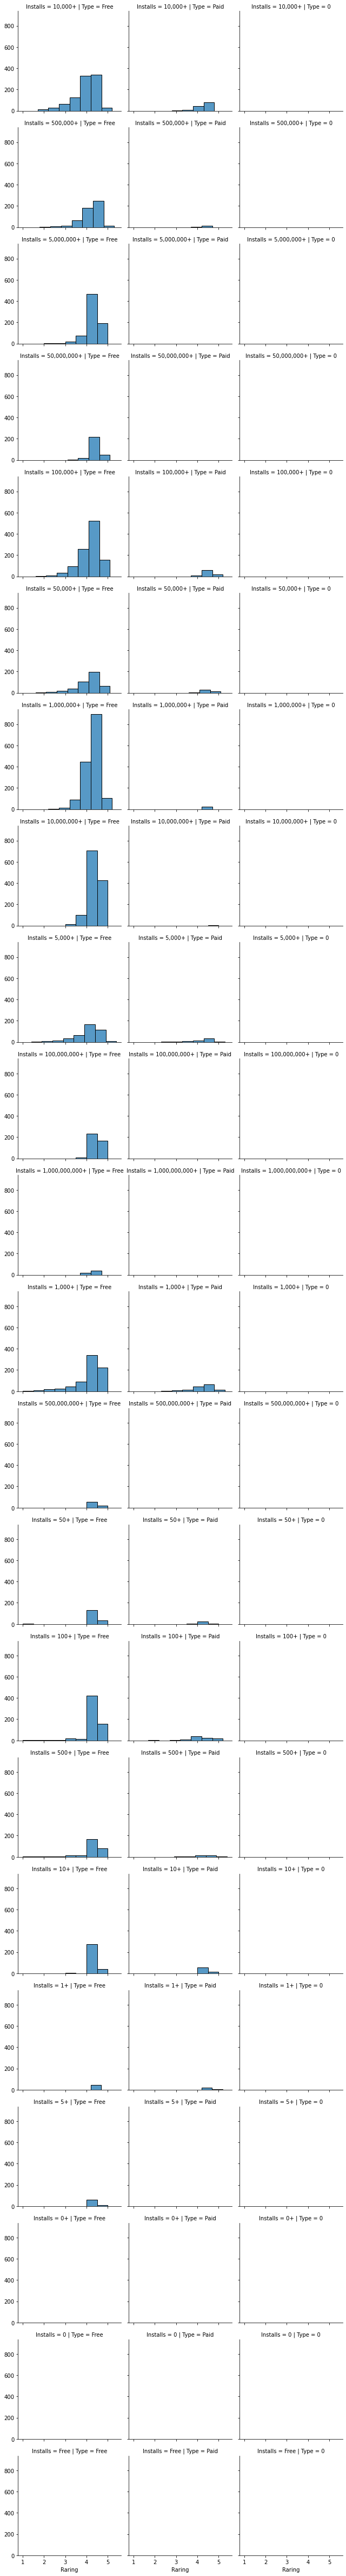

In [24]:
g3 = sns.FacetGrid(df, col="Type", row="Installs")
g3.map_dataframe(sns.histplot, x="Rating", binwidth=0.5)
g3.set_axis_labels("Raring")

## Send us the Result (Maktabkhoone)